In [1]:
from cymetric import convenient_interface as com
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


In [2]:
import cymetric as cym
db = cym.dbopen('cyclus.sqlite')

In [3]:
E1_pu_src = com.get_transaction_timeseries(db, 'E1_alt_src', 'FBR_driver_fabrication', ['pu238','pu239','pu240','pu241','pu242'])
E1_pu_src.reset_index(inplace=True)
E1_pu = com.get_transaction_timeseries(db, 'Storage_E1', 'FBR_driver_fabrication', ['pu238','pu239','pu240','pu241','pu242'])
E1_pu.reset_index(inplace=True)



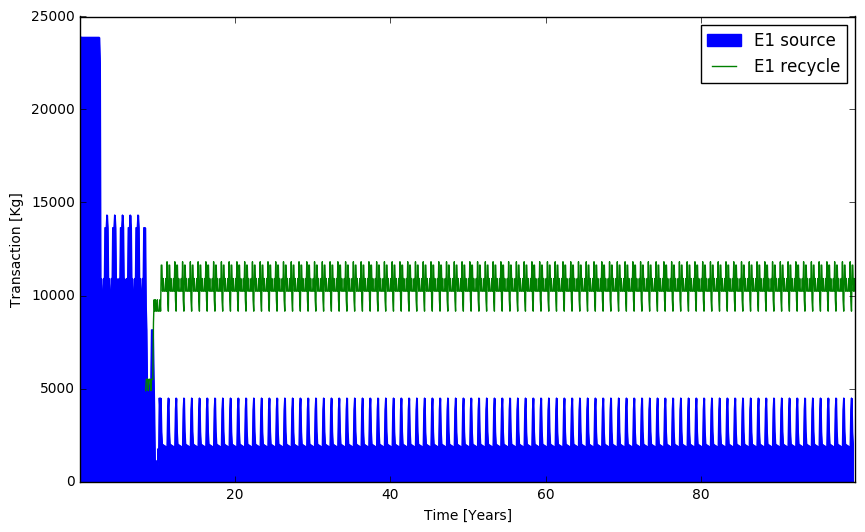

In [4]:
E1_pu_src = pd.DataFrame({'Time': E1_pu_src.Time/12., 'E1 source': E1_pu_src.Quantity})
E1_pu_src = E1_pu_src.groupby('Time').sum()
E1_pu = pd.DataFrame({'Time': E1_pu.Time/12., 'E1 recycle': E1_pu.Quantity})
E1_pu = E1_pu.groupby('Time').sum()

e1x = E1_pu_src.plot(kind='area', figsize=(10, 6))
E1_pu.plot(ax=e1x)
plt.xlabel('Time [Years]')
plt.ylabel('Transaction [Kg]')
plt.savefig('test.png', dpi=326)

In [16]:
E1_pu_src

,E1 source
Time,
0.083333,23908.568335
0.166667,23880.488322
0.250000,23876.394524
0.333333,23876.394524
0.416667,23876.394524
0.500000,23876.394524
0.583333,23876.394524
0.666667,23876.394524
0.750000,23876.394524


In [5]:
E1_pu_str = com.get_inventory_timeseries(db, 'Storage_E1', ['pu238','pu239','pu240','pu241','pu242'])
E1_pu_str.reset_index(inplace=True)



In [6]:
E1_pu_str



,index,Prototype,Time,Quantity
0,0,Storage_E1,101,4884.585968
1,1,Storage_E1,102,5495.159214
2,2,Storage_E1,103,5495.159214
3,3,Storage_E1,104,5495.159214
4,4,Storage_E1,105,4884.585968
5,5,Storage_E1,106,5495.159214
6,6,Storage_E1,107,5495.159214
7,7,Storage_E1,108,5495.159214
8,8,Storage_E1,109,4884.585968
9,9,Storage_E1,110,5495.159214


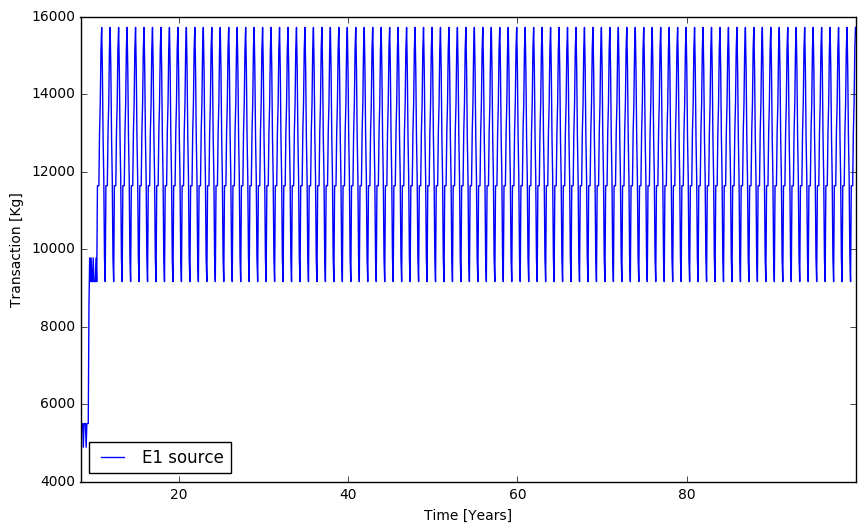

In [7]:
E1_pu_str = pd.DataFrame({'Time': E1_pu_str.Time/12., 'E1 source': E1_pu_str.Quantity})
E1_pu_str = E1_pu_str.groupby('Time').sum()

e1x = E1_pu_str.plot( figsize=(10, 6))
plt.xlabel('Time [Years]')
plt.ylabel('Transaction [Kg]')
plt.savefig('test.png', dpi=326)

In [8]:
J1_pu_src = com.get_transaction_timeseries(db, 'J1_TRU_alt_src', 'FBR_driver_fabrication', ['pu238','pu239','pu240','pu241','pu242'])
J1_pu_src.reset_index(inplace=True)
J1_pu = com.get_transaction_timeseries(db, 'Storage_J1_TRU', 'FBR_driver_fabrication', ['pu238','pu239','pu240','pu241','pu242'])
J1_pu.reset_index(inplace=True)


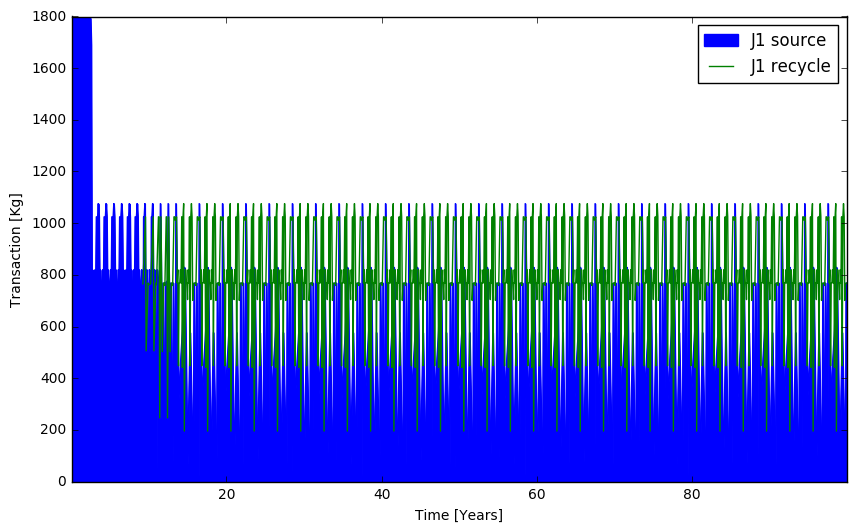

In [9]:
J1_pu_src = pd.DataFrame({'Time': J1_pu_src.Time/12., 'J1 source': J1_pu_src.Quantity})
J1_pu_src = J1_pu_src.groupby('Time').sum()
J1_pu = pd.DataFrame({'Time': J1_pu.Time/12., 'J1 recycle': J1_pu.Quantity})
J1_pu = J1_pu.groupby('Time').sum()

j1x = J1_pu_src.plot(kind='area', figsize=(10, 6))
J1_pu.plot(ax=j1x)
plt.xlabel('Time [Years]')
plt.ylabel('Transaction [Kg]')
plt.savefig('test.png', dpi=326)

In [10]:
E2_pu_src = com.get_transaction_timeseries(db, 'E2_alt_src', 'PWR_fabrication', ['pu238','pu239','pu240','pu241','pu242'])
E2_pu_src.reset_index(inplace=True)
E2_pu = com.get_transaction_timeseries(db, 'Storage_E2', 'PWR_fabrication', ['pu238','pu239','pu240','pu241','pu242'])
E2_pu.reset_index(inplace=True)




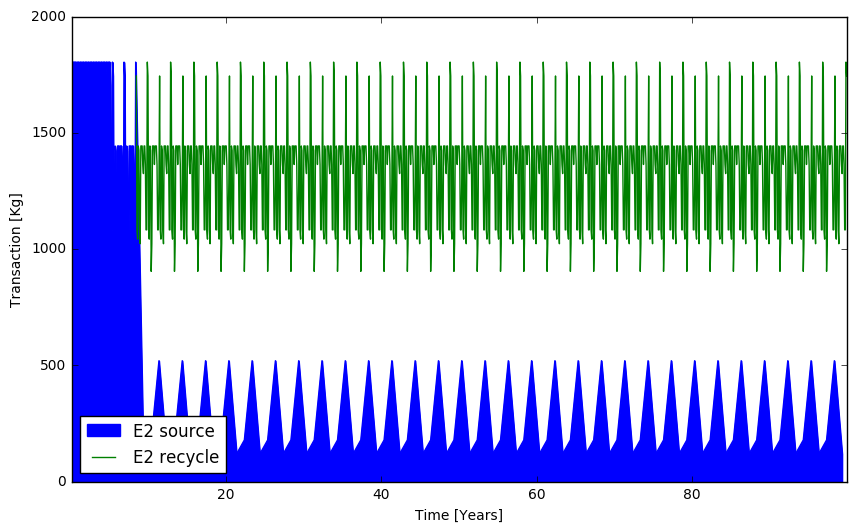

In [11]:
E2_pu_src = pd.DataFrame({'Time': E2_pu_src.Time/12., 'E2 source': E2_pu_src.Quantity})
E2_pu_src = E2_pu_src.groupby('Time').sum()
E2_pu = pd.DataFrame({'Time': E2_pu.Time/12., 'E2 recycle': E2_pu.Quantity})
E2_pu = E2_pu.groupby('Time').sum()


e2x = E2_pu_src.plot(kind='area', figsize=(10, 6))
E2_pu.plot(ax=e2x)
plt.xlabel('Time [Years]')
plt.ylabel('Transaction [Kg]')
plt.savefig('test.png', dpi=326)